<a href="https://colab.research.google.com/github/IshitaLohia/Customer-Segmentation/blob/main/Retail_EDA_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# New Section

In [ ]:
import pandas as pd
import openpyxl

# Load the Excel file
df = pd.read_excel("/content/sample_data/Retail.xlsx", engine="openpyxl")


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:


# Display basic information
print(df.info())

# Show first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    

In [ ]:
#Handle Missing Values

# Drop missing Customer IDs (since they are important for segmentation)
df = df.dropna(subset=['CustomerID'])

# Remove negative or zero quantities and prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a Total Sales column
df['TotalSales'] = df['Quantity'] * df['UnitPrice']



<ipython-input-7-65fa1f9b1e12>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
<ipython-input-7-65fa1f9b1e12>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSales'] = df['Quantity'] * df['UnitPrice']


<ipython-input-8-aa5e670a0480>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period("M")


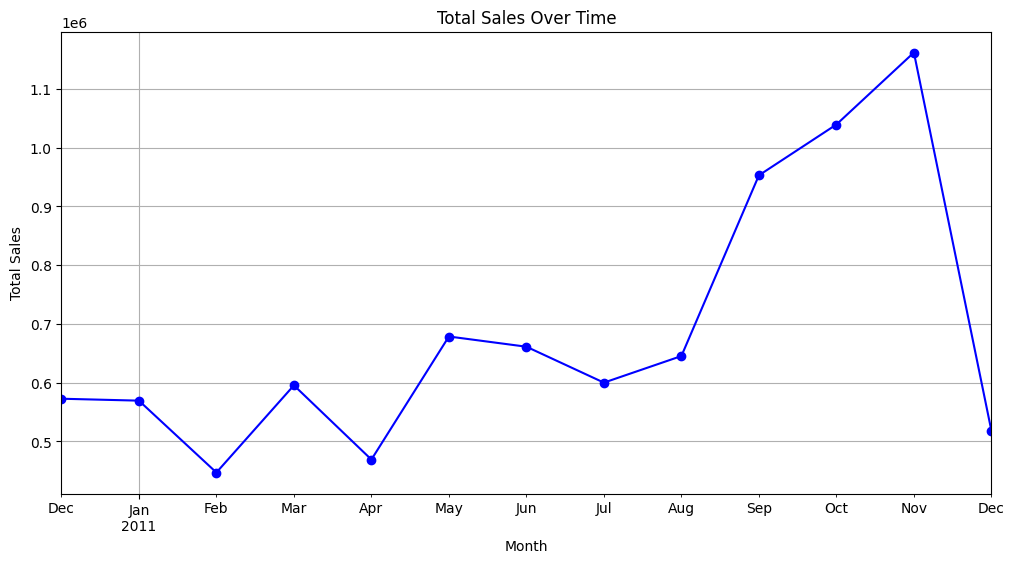

In [ ]:
# Sales Trend Analysis

# Aggregate sales per month
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period("M")
monthly_sales = df.groupby('InvoiceMonth')['TotalSales'].sum()

# Plot sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title("Total Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()




<ipython-input-9-ab1193efbea9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


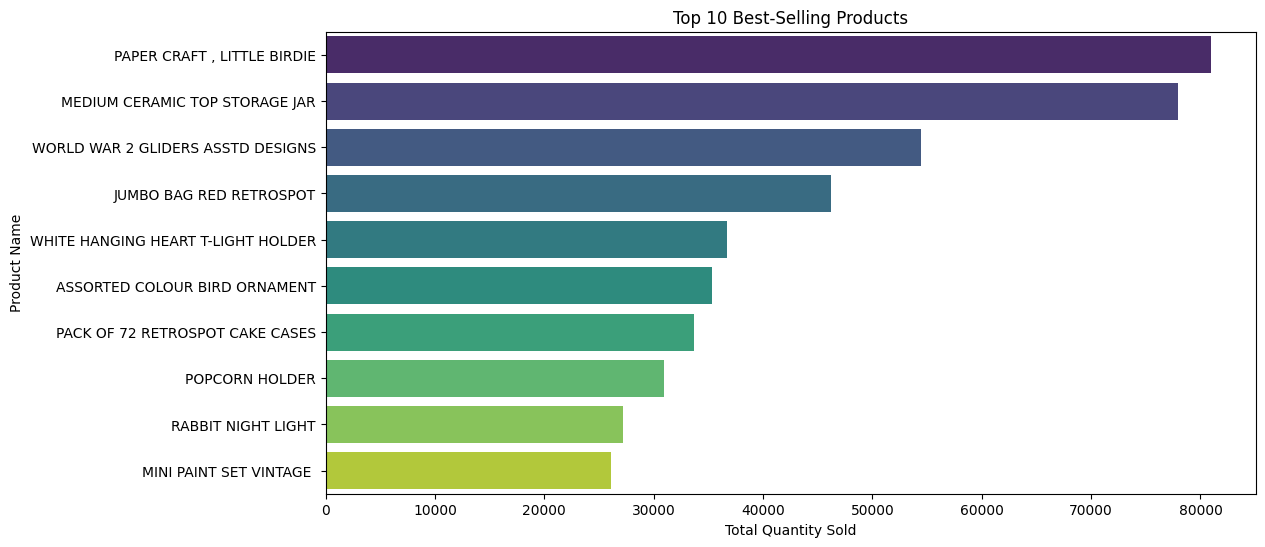

In [ ]:
# Best Selling products

top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()


In [ ]:
#Customer Segmentation (RFM)

import datetime as dt

# Define snapshot date (latest date in dataset)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM Calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalSales': 'sum'  # Monetary
})

# Rename columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSales': 'Monetary'}, inplace=True)

# Display first few rows
print(rfm.head())


            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          19         73   1757.55
12350.0         310         17    334.40


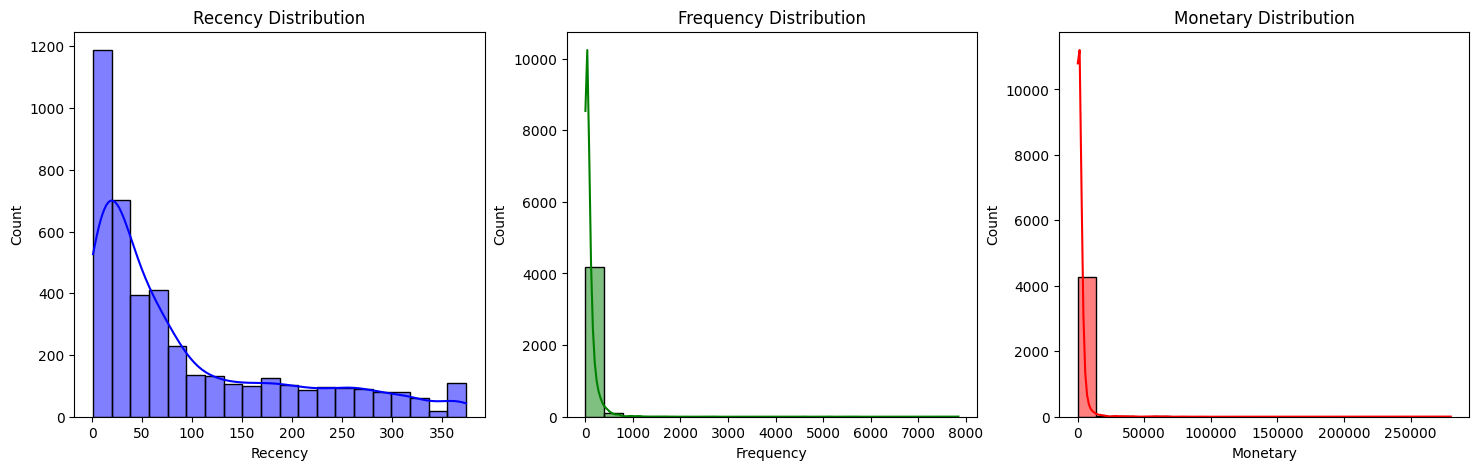

In [ ]:
#Visualizing RFM

# Histogram of RFM Metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm['Recency'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Recency Distribution")

sns.histplot(rfm['Frequency'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title("Frequency Distribution")

sns.histplot(rfm['Monetary'], bins=20, kde=True, ax=axes[2], color='red')
axes[2].set_title("Monetary Distribution")

plt.show()


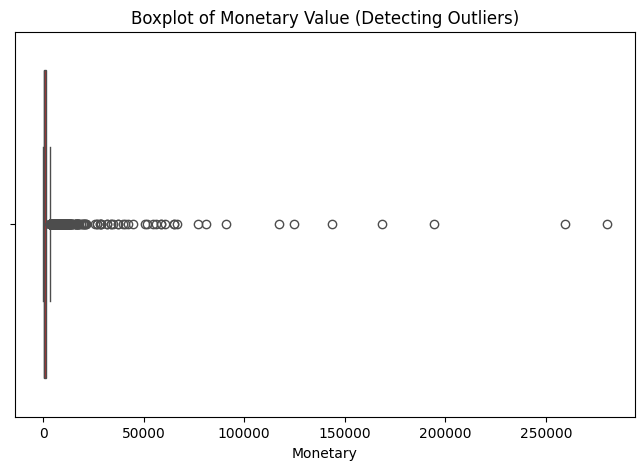

In [ ]:
#Outlier Detection

plt.figure(figsize=(8, 5))
sns.boxplot(x=rfm['Monetary'], color="red")
plt.title("Boxplot of Monetary Value (Detecting Outliers)")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/content/sample_data/Retail.xlsx", engine="openpyxl")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<ipython-input-16-bc22db5afdd4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


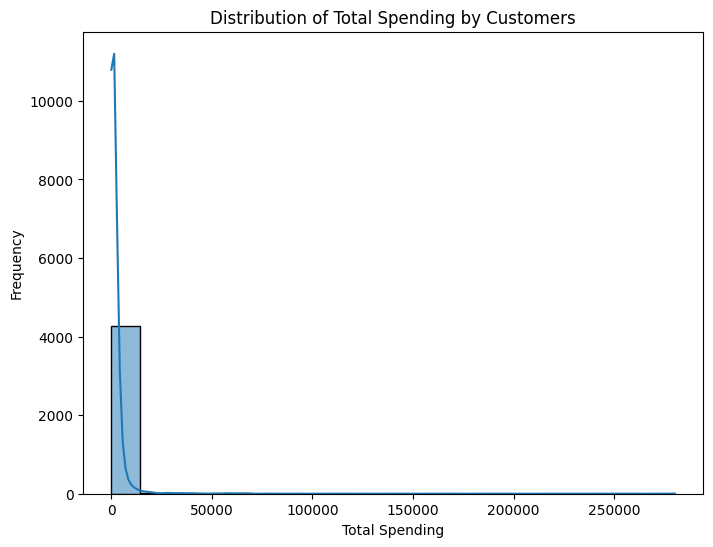

In [ ]:

# Data Preprocessing
df.dropna(inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Aggregate data for EDA
customer_data = df.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum',
    'InvoiceNo': 'nunique',  # Number of unique transactions
    'UnitPrice': 'mean',
    'InvoiceDate': 'count'  # Assuming time-based transactions
}).rename(columns={'InvoiceNo': 'NumTransactions', 'InvoiceDate': 'NumDays'})

# Exploratory Data Analysis (EDA) with Business Questions

# 1. Distribution of Total Spending
plt.figure(figsize=(8, 6))
sns.histplot(customer_data['TotalPrice'], bins=20, kde=True)
plt.xlabel("Total Spending")
plt.ylabel("Frequency")
plt.title("Distribution of Total Spending by Customers")
plt.show()


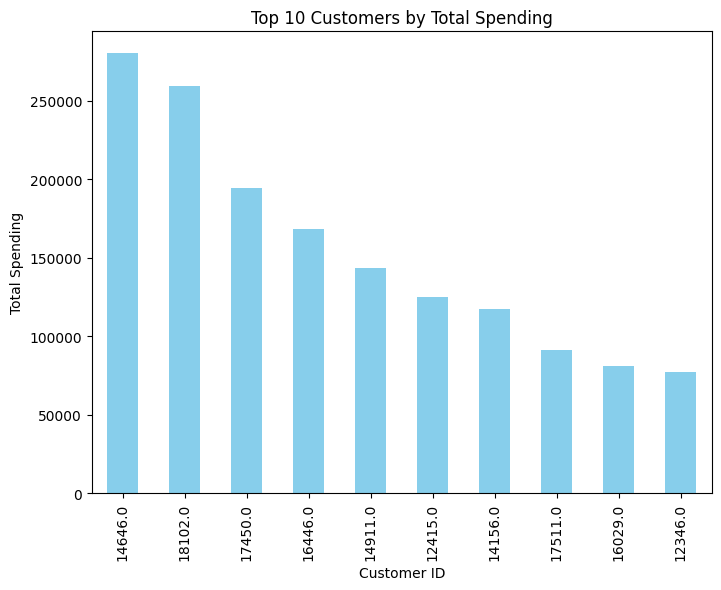

In [ ]:

# 2. Top 10 Customers by Spending
top_customers = customer_data['TotalPrice'].nlargest(10)
plt.figure(figsize=(8, 6))
top_customers.plot(kind='bar', color='skyblue')
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.title("Top 10 Customers by Total Spending")
plt.show()



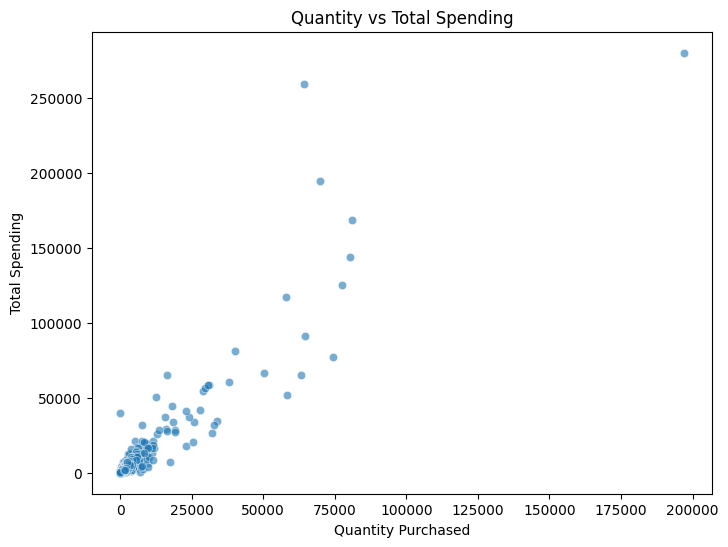

In [ ]:
# 3. Relationship Between Quantity Purchased and Spending
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_data['Quantity'], y=customer_data['TotalPrice'], alpha=0.6)
plt.xlabel("Quantity Purchased")
plt.ylabel("Total Spending")
plt.title("Quantity vs Total Spending")
plt.show()



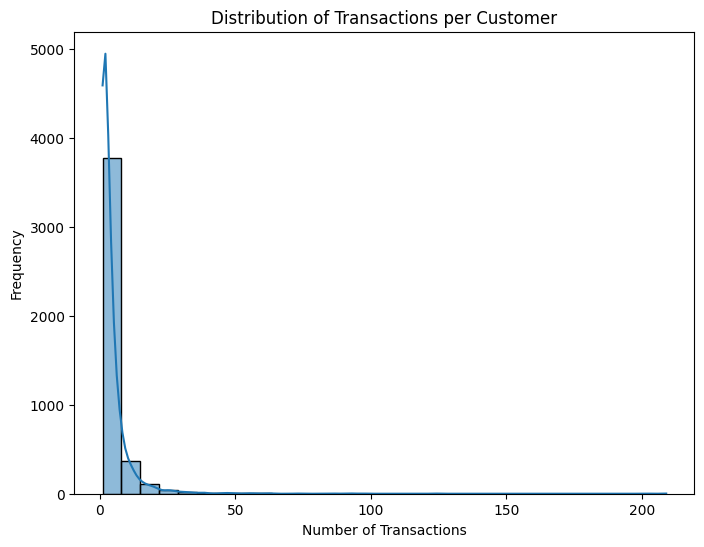

In [ ]:
# 4. Number of Transactions per Customer
plt.figure(figsize=(8, 6))
sns.histplot(customer_data['NumTransactions'], bins=30, kde=True)
plt.xlabel("Number of Transactions")
plt.ylabel("Frequency")
plt.title("Distribution of Transactions per Customer")
plt.show()


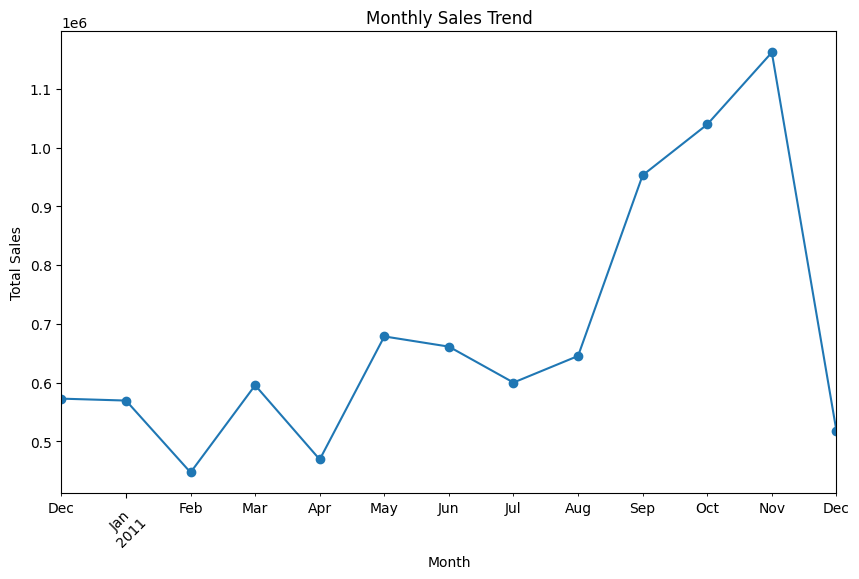

In [ ]:

# 5. Monthly Sales Trend
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalPrice'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()


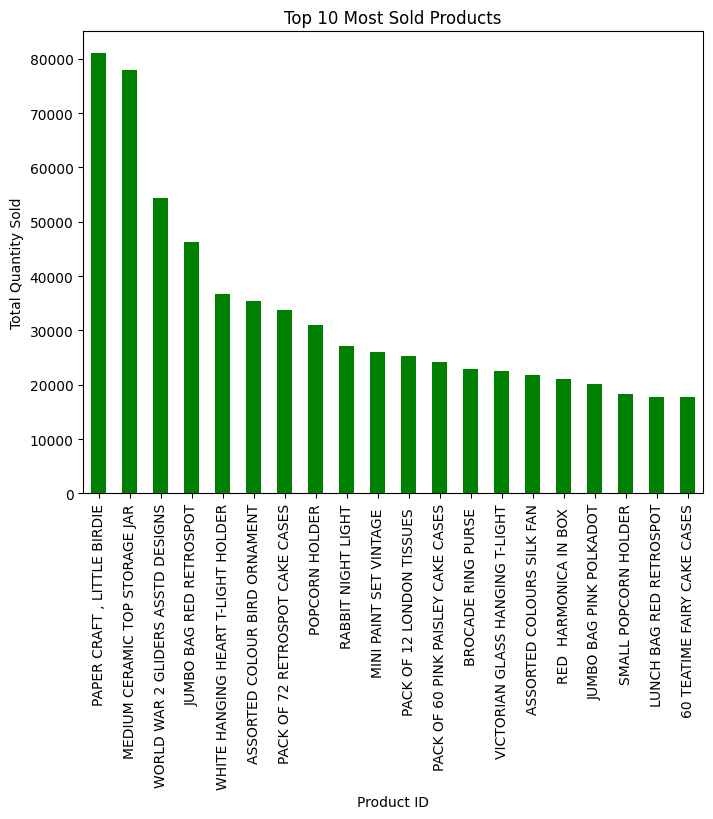

In [ ]:

# 6. Most Sold Products
top_products = df.groupby('Description')['Quantity'].sum().nlargest(20)
plt.figure(figsize=(8, 6))
top_products.plot(kind='bar', color='green')
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.title("Top 10 Most Sold Products")
plt.show()


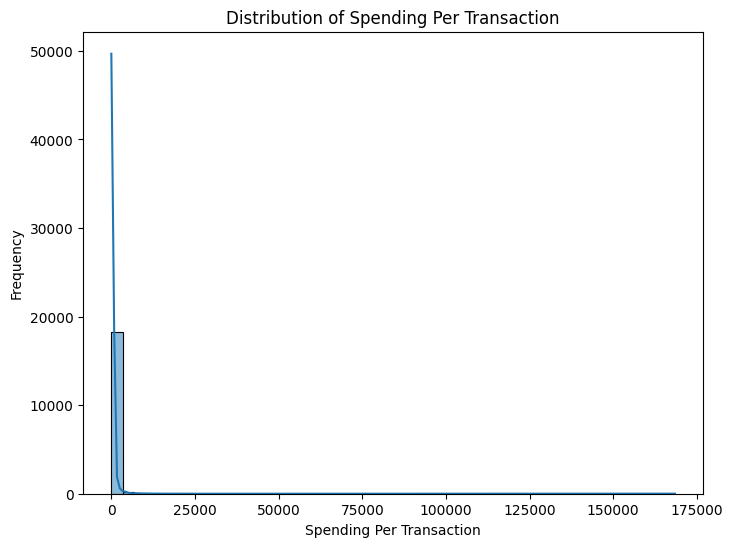

In [ ]:

# 7. Average Spending Per Transaction
plt.figure(figsize=(8, 6))
sns.histplot(df.groupby('InvoiceNo')['TotalPrice'].sum(), bins=50, kde=True)
plt.xlabel("Spending Per Transaction")
plt.ylabel("Frequency")
plt.title("Distribution of Spending Per Transaction")
plt.show()





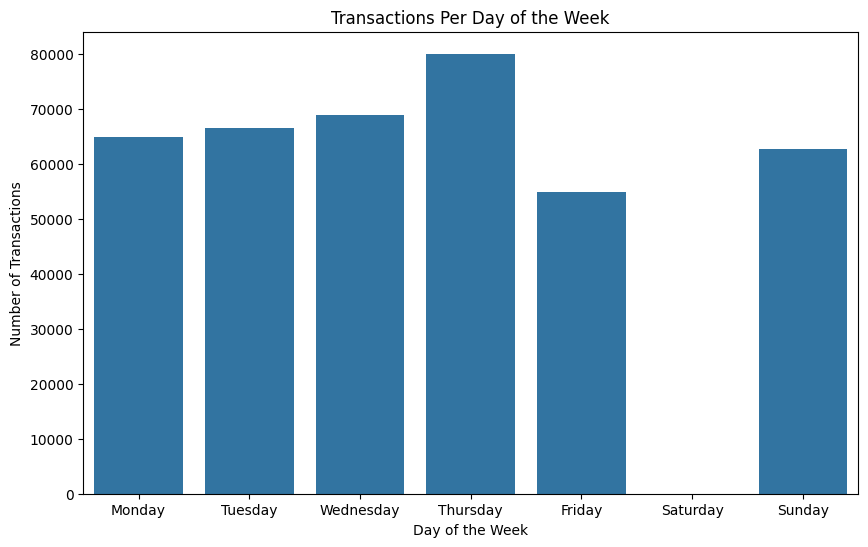

In [ ]:

# 8. Day of the Week Analysis
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.title("Transactions Per Day of the Week")
plt.show()


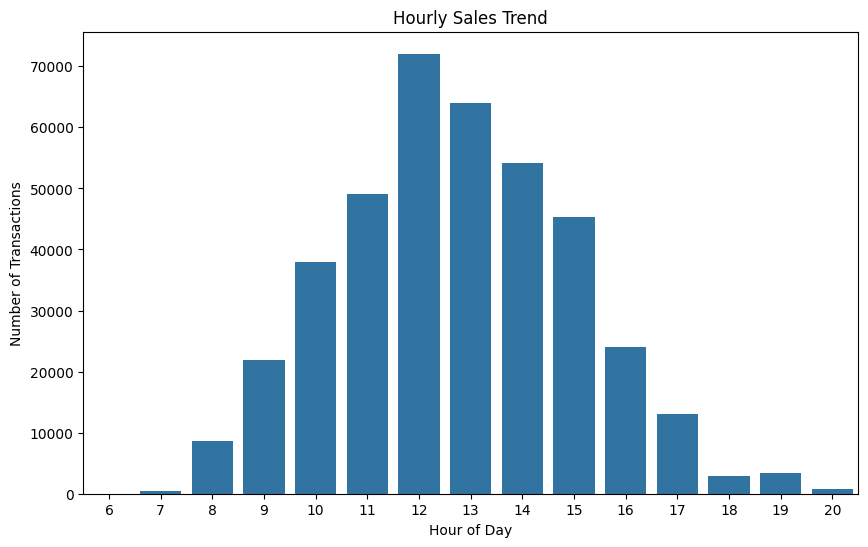

In [ ]:

# 9. Hourly Sales Trend
df['Hour'] = df['InvoiceDate'].dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.title("Hourly Sales Trend")
plt.show()



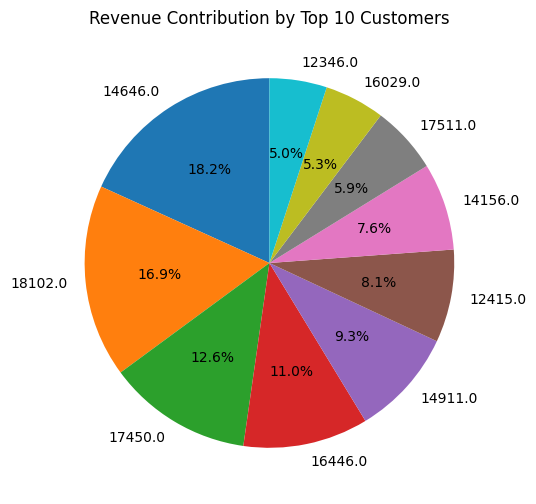

In [ ]:
# 10. Revenue Contribution by Top 10 Customers
top_customers_revenue = customer_data.nlargest(10, 'TotalPrice')
plt.figure(figsize=(8, 6))
top_customers_revenue['TotalPrice'].plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Revenue Contribution by Top 10 Customers")
plt.ylabel("")
plt.show()

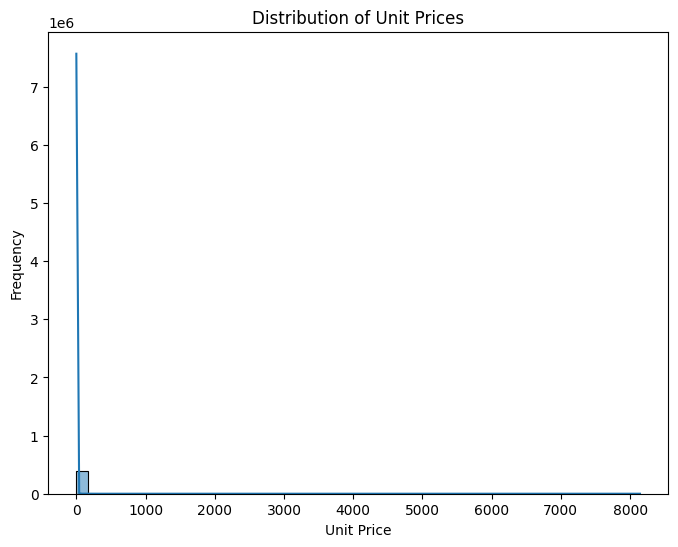

In [ ]:
# 11. Distribution of Unit Price
plt.figure(figsize=(8, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.title("Distribution of Unit Prices")
plt.show()

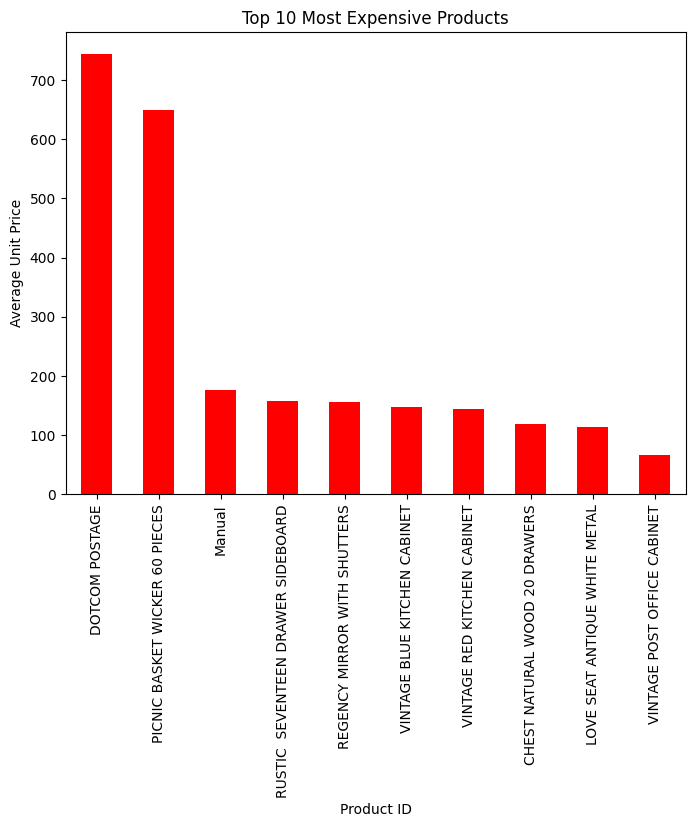

In [ ]:


# 12. Top 10 Most Expensive Products
expensive_products = df.groupby('Description')['UnitPrice'].mean().nlargest(10)
plt.figure(figsize=(8, 6))
expensive_products.plot(kind='bar', color='red')
plt.xlabel("Product ID")
plt.ylabel("Average Unit Price")
plt.title("Top 10 Most Expensive Products")
plt.show()

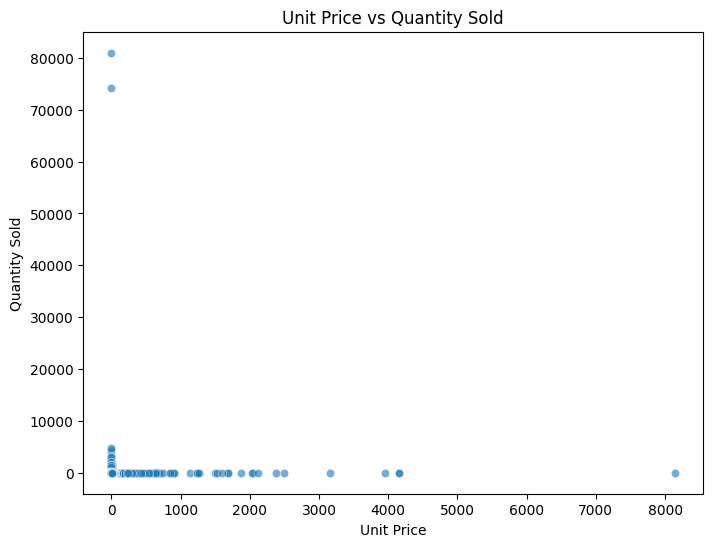

In [ ]:
# 13. Relationship Between Unit Price and Quantity Sold
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['UnitPrice'], y=df['Quantity'], alpha=0.6)
plt.xlabel("Unit Price")
plt.ylabel("Quantity Sold")
plt.title("Unit Price vs Quantity Sold")
plt.show()

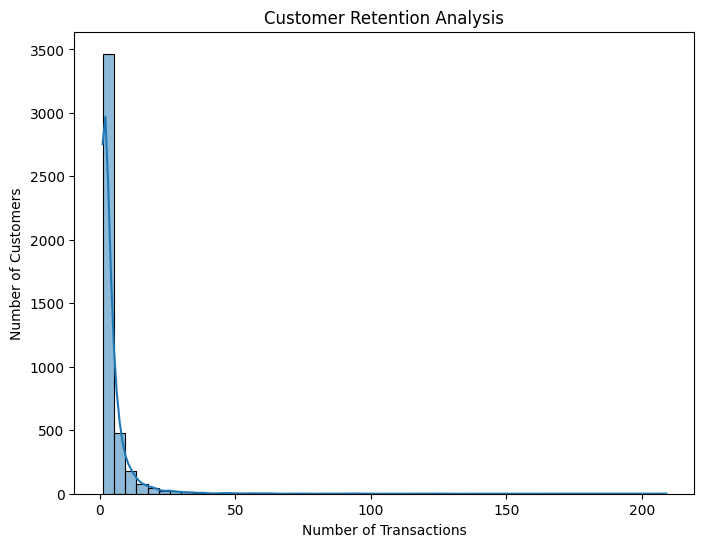

In [ ]:

# 14. Customer Retention Analysis (Repeat Customers)
repeat_customers = df.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(8, 6))
sns.histplot(repeat_customers, bins=50, kde=True)
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customers")
plt.title("Customer Retention Analysis")
plt.show()

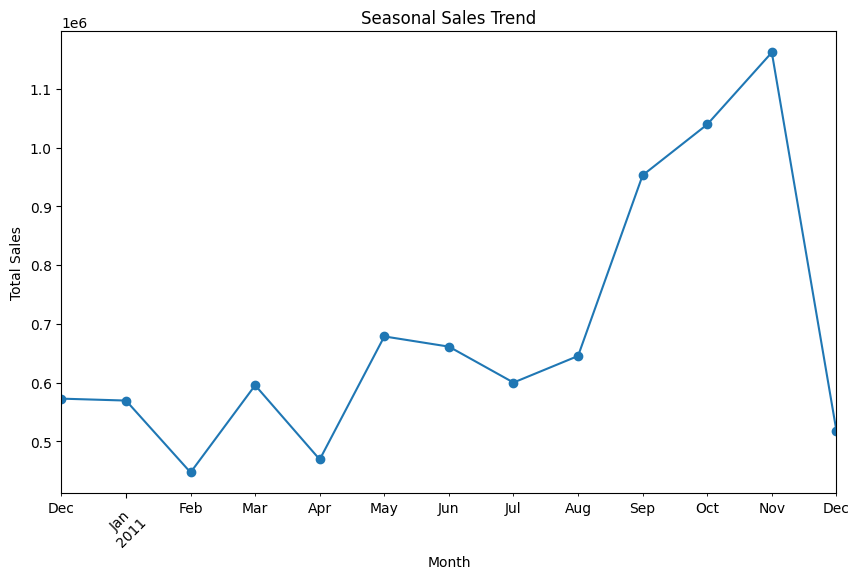

In [ ]:

# 15. Seasonal Sales Trend
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
seasonal_sales = df.groupby('YearMonth')['TotalPrice'].sum()
plt.figure(figsize=(10, 6))
seasonal_sales.plot(marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Seasonal Sales Trend")
plt.xticks(rotation=45)
plt.show()

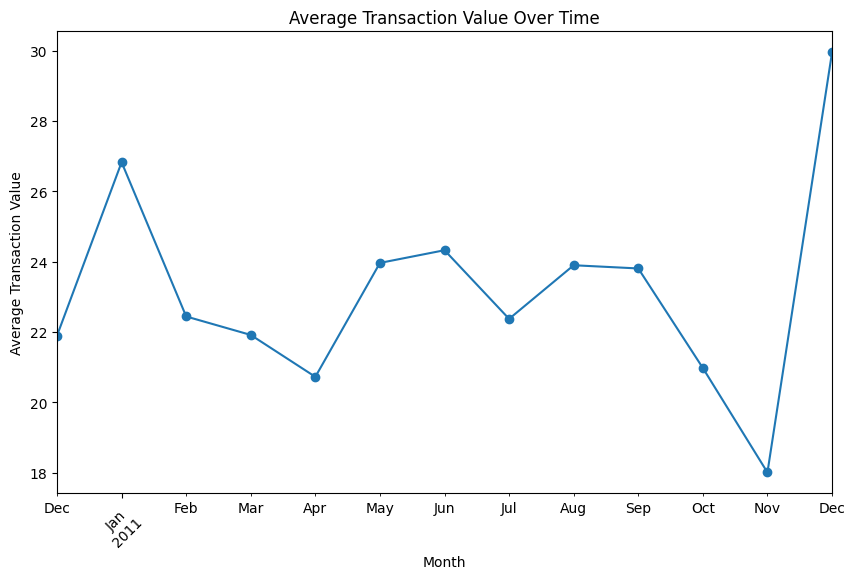

In [ ]:

# 16. Average Transaction Value Over Time
avg_transaction_value = df.groupby('Month')['TotalPrice'].mean()
plt.figure(figsize=(10, 6))
avg_transaction_value.plot(marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Transaction Value")
plt.title("Average Transaction Value Over Time")
plt.xticks(rotation=45)
plt.show()

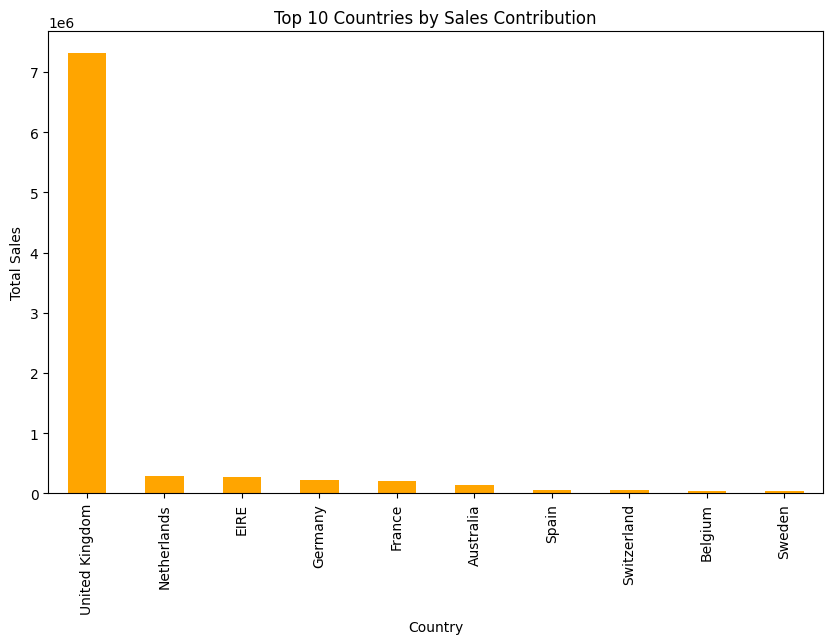

In [ ]:
# 18. Sales Contribution by Country
country_sales = df.groupby('Country')['TotalPrice'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color='orange')
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.title("Top 10 Countries by Sales Contribution")
plt.show()


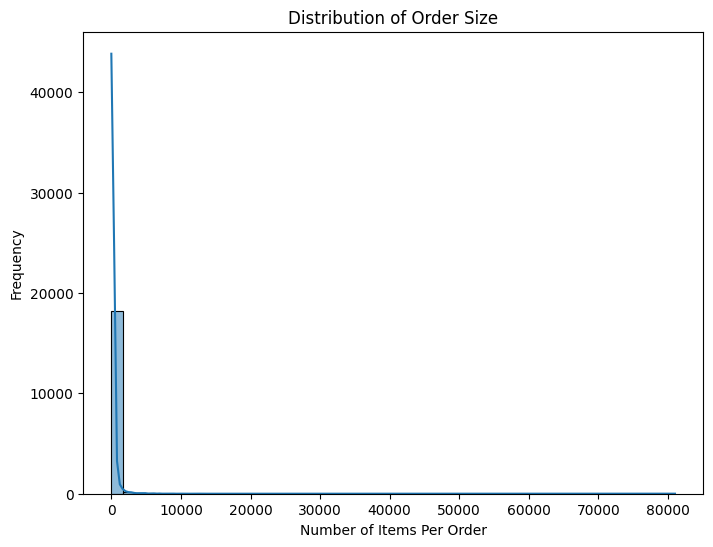

In [ ]:
# 19. Average Order Size (Items per Order)
avg_order_size = df.groupby('InvoiceNo')['Quantity'].sum()
plt.figure(figsize=(8, 6))
sns.histplot(avg_order_size, bins=50, kde=True)
plt.xlabel("Number of Items Per Order")
plt.ylabel("Frequency")
plt.title("Distribution of Order Size")
plt.show()

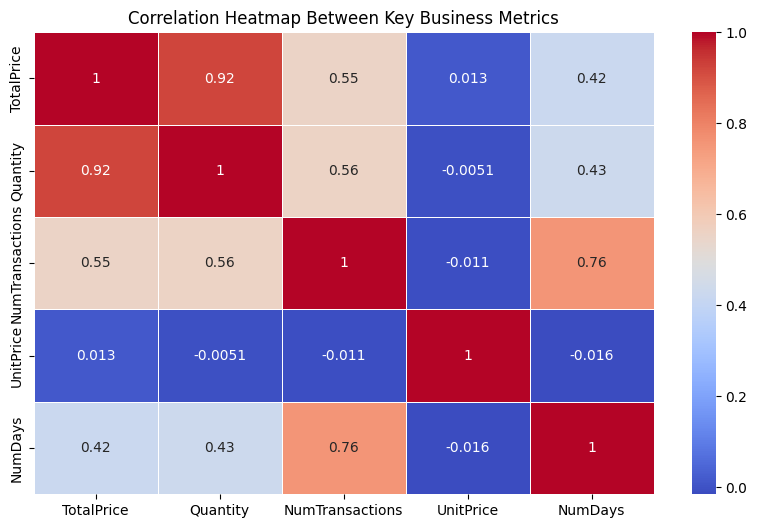

In [ ]:




# 20. Correlation Heatmap Between Key Metrics
plt.figure(figsize=(10, 6))
sns.heatmap(customer_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap Between Key Business Metrics")
plt.show()



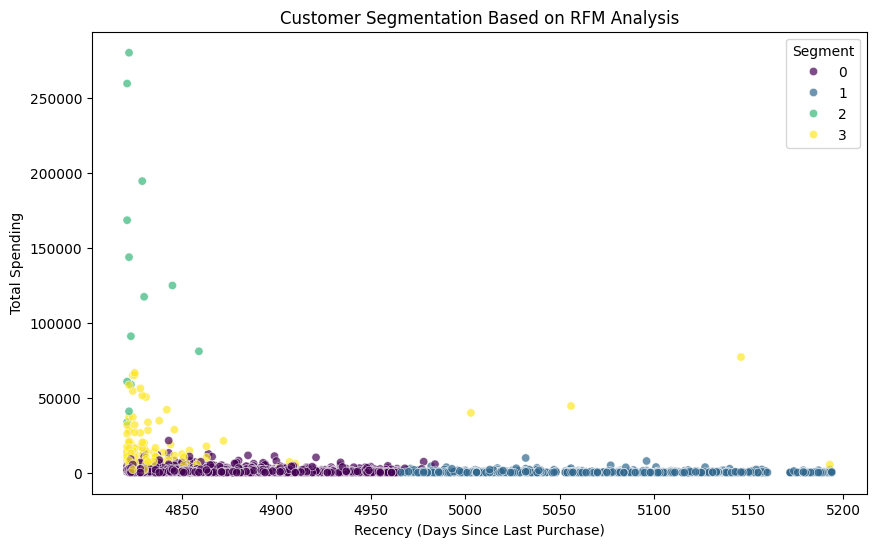

Segment Summary:
             Recency  Frequency       Monetary
Segment                                       
0        4864.433007   3.678758    1358.166913
1        5069.173421   1.551367     478.194732
2        4827.615385  82.538462  127338.313846
3        4835.955882  22.333333   12709.090490
Customer segmentation results saved to customer_segmentation_results.csv


In [ ]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


# Data Preprocessing
df.dropna(inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract Customer-Level Data for Segmentation
customer_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (datetime.now() - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary' })

# Normalize Data for Clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
customer_data['Segment'] = kmeans_labels

# Visualize Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data['Recency'], y=customer_data['Monetary'], hue=customer_data['Segment'], palette='viridis', alpha=0.7)
plt.xlabel("Recency (Days Since Last Purchase)")
plt.ylabel("Total Spending")
plt.title("Customer Segmentation Based on RFM Analysis")
plt.legend(title="Segment")
plt.show()

# Segment Insights
segment_summary = customer_data.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})
print("Segment Summary:")
print(segment_summary)

# Save customer segmentation results
customer_data.to_csv("customer_segmentation_results.csv")
print("Customer segmentation results saved to customer_segmentation_results.csv")


🔹 Key Observations from the Plot
1️⃣ High-Spending, Recent Buyers (Cluster 2 - Green Dots)

These customers have high total spending and relatively lower recency.
They are likely VIP or loyal customers who make frequent, high-value purchases.
📢 Business Strategy:
✅ Offer them exclusive loyalty programs, early-access sales, and premium perks to retain them.
2️⃣ Moderate-Spending, Recent Buyers (Cluster 3 - Yellow Dots)

Customers with moderate spending but still relatively recent purchases.
They may be engaged shoppers but not high-value spenders yet.
📢 Business Strategy:
✅ Target them with personalized discounts and product recommendations to increase their purchase frequency.
3️⃣ Low-Spending, Long Time Since Last Purchase (Cluster 1 - Blue Dots)

Customers who haven't shopped in a long time and have low spending.
These are potential churn-risk customers who may never return.
📢 Business Strategy:
✅ Implement win-back campaigns, re-engagement emails, and exclusive comeback offers to bring them back.
4️⃣ Very Low-Spending, Very Long Recency (Cluster 0 - Purple Dots)

These customers made one-time purchases long ago and never returned.
They represent low-value, inactive customers.
📢 Business Strategy:
✅ Consider removing them from premium marketing campaigns but targeting them with mass email promotions to gauge interest.
📌 Business Recommendations Based on This Analysis
✅ Retain High-Value Customers – Offer loyalty rewards and VIP perks.
✅ Convert Medium Spenders – Use personalized discounts and upselling tactics.
✅ Re-engage Churned Customers – Target them with exclusive return incentives.
✅ Optimize Marketing Spend – Focus budget on segments with high potential return on investment (ROI).